In [1]:
##import libraries
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir= '../input/animals-detection-images-dataset/train'
test_dir='../input/animals-detection-images-dataset/test'

Lion sample size :  208 

Camel sample size :  67 

Cheetah sample size :  132 

Crocodile sample size :  108 

Deer sample size :  327 

Elephant sample size :  155 

Fox sample size :  148 

Giraffe sample size :  298 

Jaguar sample size :  100 

Leopard sample size :  123 

Tiger sample size :  313 

Zebra sample size :  181 

training data size : 2160


<BarContainer object of 12 artists>

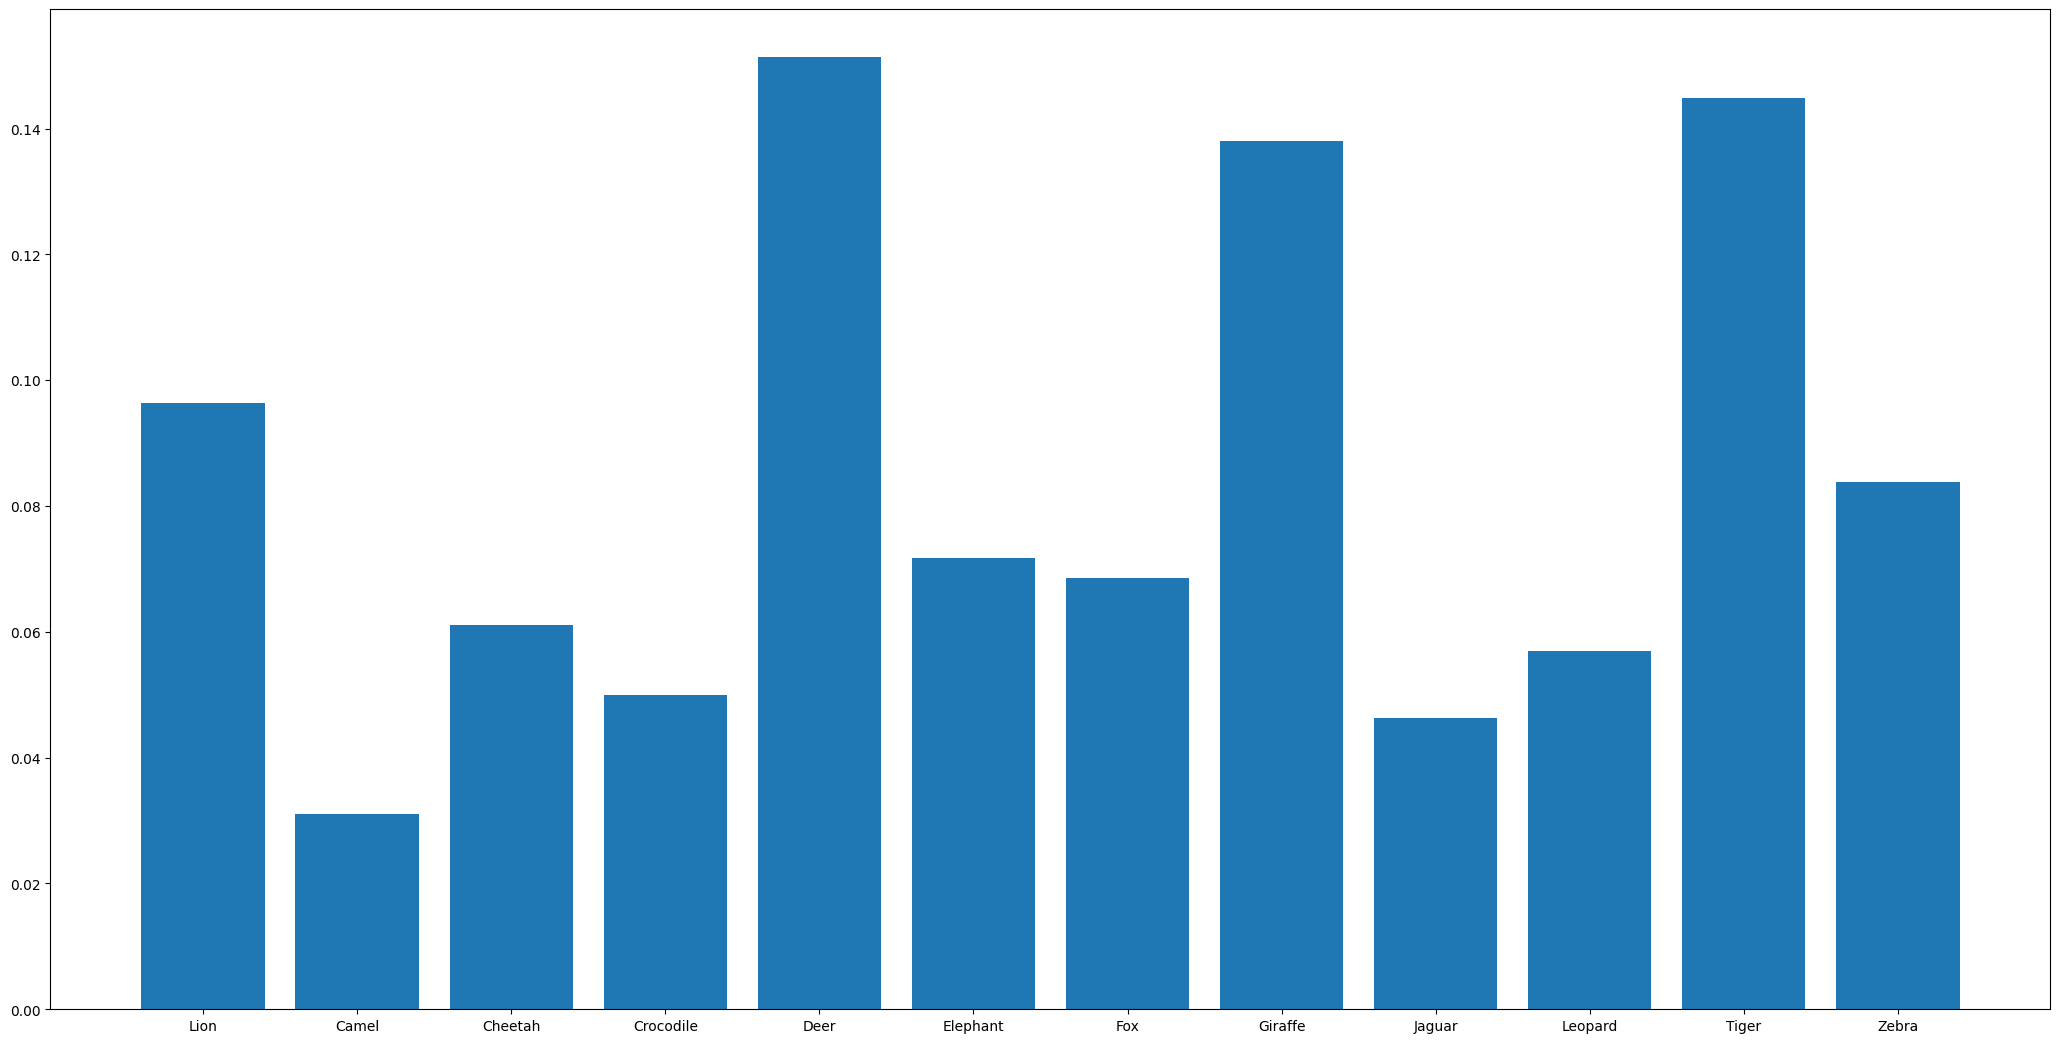

In [3]:
training_images_files_names_Lion = len(os.listdir("../input/animals-detection-images-dataset/train/Lion"))-1
training_images_files_names_Camel = len(os.listdir("../input/animals-detection-images-dataset/train/Camel"))-1
training_images_files_names_Cheetah = len(os.listdir("../input/animals-detection-images-dataset/train/Cheetah"))-1
training_images_files_names_Crocodile = len(os.listdir("../input/animals-detection-images-dataset/train/Crocodile"))-1
training_images_files_names_Deer = len(os.listdir("../input/animals-detection-images-dataset/train/Deer"))-1
training_images_files_names_Elephant = len(os.listdir("../input/animals-detection-images-dataset/train/Elephant"))-1
training_images_files_names_Fox = len(os.listdir("../input/animals-detection-images-dataset/train/Fox"))-1
training_images_files_names_Giraffe = len(os.listdir("../input/animals-detection-images-dataset/train/Giraffe"))-1
training_images_files_names_Jaguar = len(os.listdir("../input/animals-detection-images-dataset/train/Jaguar"))-1
training_images_files_names_Leopard = len(os.listdir("../input/animals-detection-images-dataset/train/Leopard"))-1
training_images_files_names_Tiger = len(os.listdir("../input/animals-detection-images-dataset/train/Tiger"))-1
training_images_files_names_Zebra = len(os.listdir("../input/animals-detection-images-dataset/train/Zebra"))-1
print("Lion sample size : ",training_images_files_names_Lion,"\n")
print("Camel sample size : ",training_images_files_names_Camel,"\n")
print("Cheetah sample size : ",training_images_files_names_Cheetah,"\n")
print("Crocodile sample size : ",training_images_files_names_Crocodile,"\n")
print("Deer sample size : ",training_images_files_names_Deer,"\n")
print("Elephant sample size : ",training_images_files_names_Elephant,"\n")
print("Fox sample size : ",training_images_files_names_Fox,"\n")
print("Giraffe sample size : ",training_images_files_names_Giraffe,"\n")
print("Jaguar sample size : ",training_images_files_names_Jaguar,"\n")
print("Leopard sample size : ",training_images_files_names_Leopard,"\n")
print("Tiger sample size : ",training_images_files_names_Tiger,"\n")
print("Zebra sample size : ",training_images_files_names_Zebra,"\n")
training_data_size = training_images_files_names_Lion+training_images_files_names_Camel+training_images_files_names_Cheetah+training_images_files_names_Crocodile+training_images_files_names_Deer+training_images_files_names_Elephant+training_images_files_names_Fox+training_images_files_names_Giraffe+training_images_files_names_Jaguar+training_images_files_names_Leopard+training_images_files_names_Tiger+training_images_files_names_Zebra
occurences = [training_images_files_names_Lion/training_data_size ,training_images_files_names_Camel/training_data_size ,training_images_files_names_Cheetah/training_data_size ,training_images_files_names_Crocodile/training_data_size ,training_images_files_names_Deer/training_data_size ,training_images_files_names_Elephant/training_data_size ,training_images_files_names_Fox/training_data_size,training_images_files_names_Giraffe/training_data_size,training_images_files_names_Jaguar/training_data_size,training_images_files_names_Leopard/training_data_size,training_images_files_names_Tiger/training_data_size,training_images_files_names_Zebra/training_data_size]
print("training data size :",training_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"],occurences)

Lion sample size :  100 

Camel sample size :  27 

Cheetah sample size :  35 

Crocodile sample size :  76 

Deer sample size :  177 

Elephant sample size :  33 

Fox sample size :  69 

Giraffe sample size :  23 

Jaguar sample size :  38 

Leopard sample size :  57 

Tiger sample size :  26 

Zebra sample size :  31 

validation data size: 2160


<BarContainer object of 12 artists>

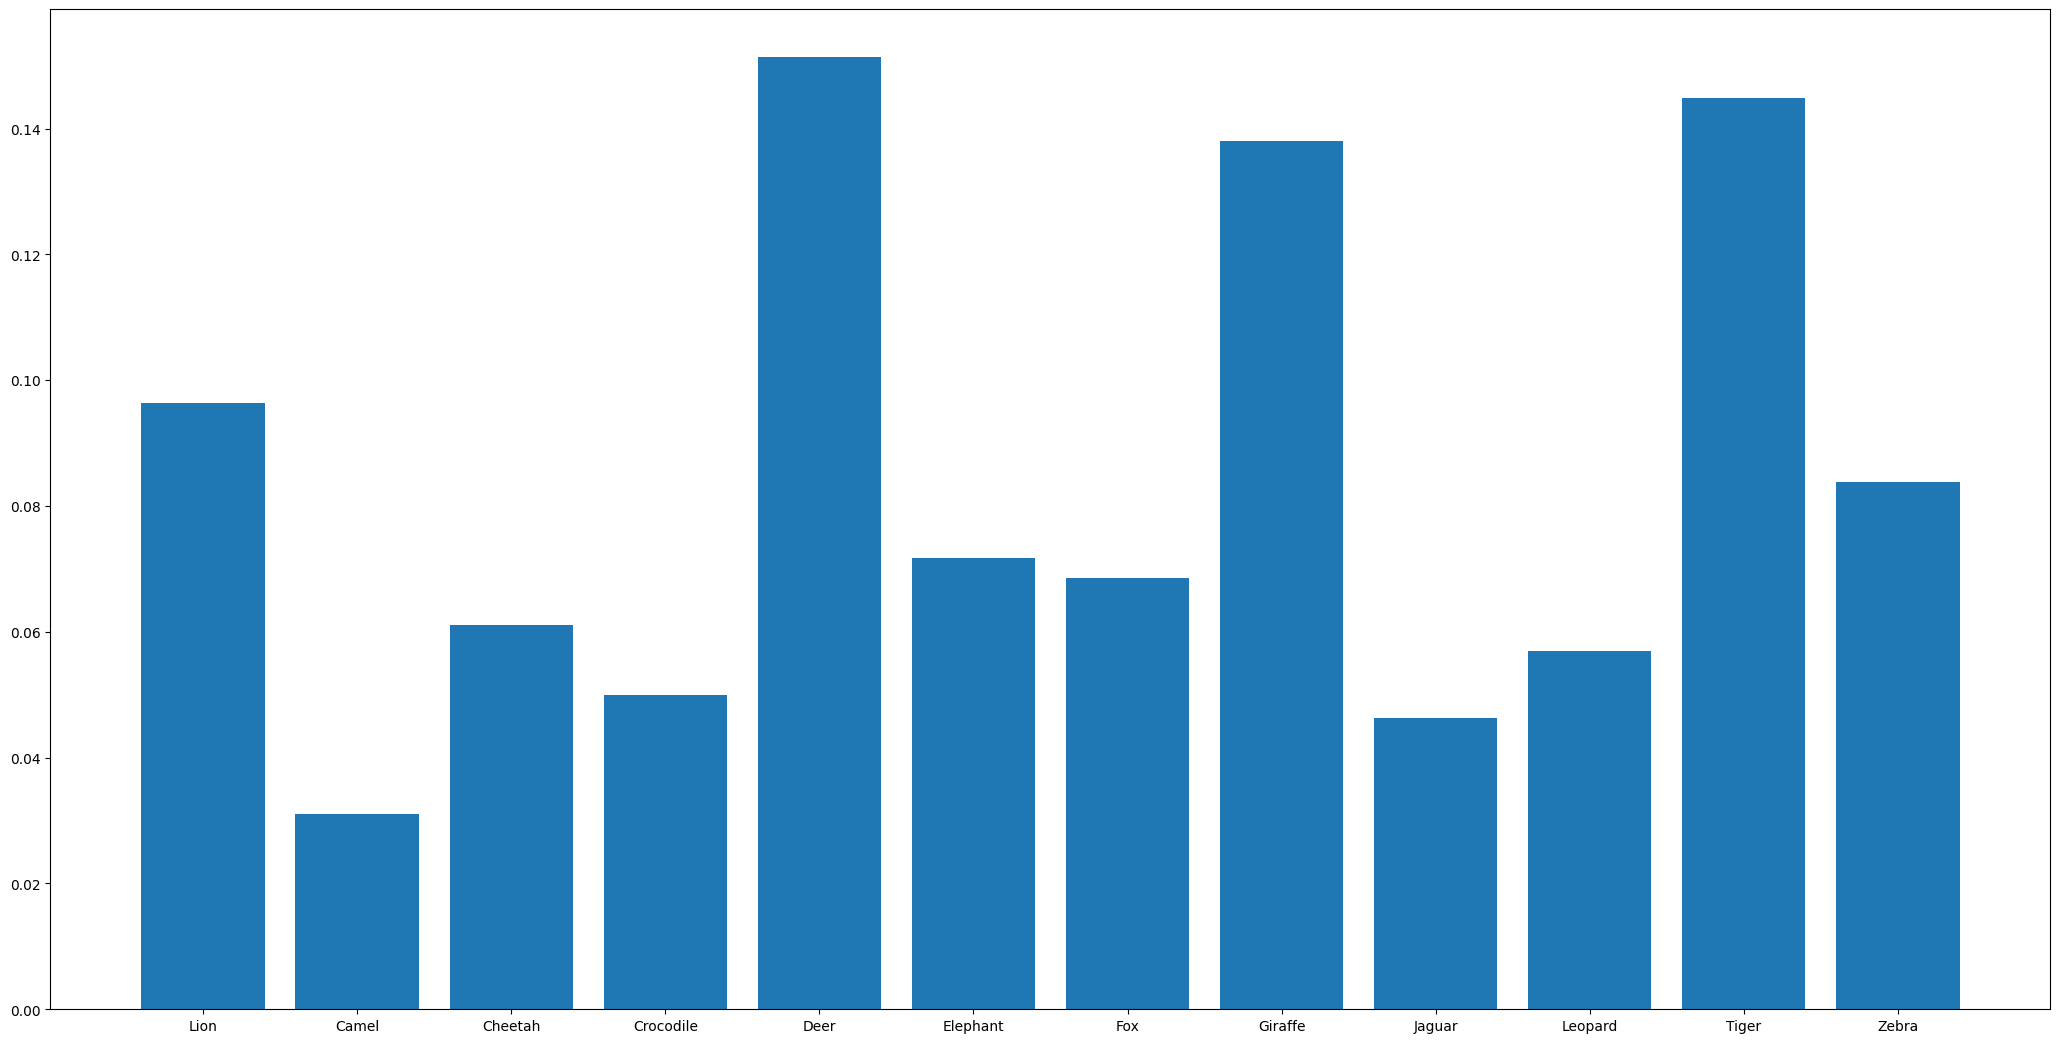

In [4]:
training_images_files_names_lion = len(os.listdir("../input/animals-detection-images-dataset/test/Lion"))-1
training_images_files_names_camel = len(os.listdir("../input/animals-detection-images-dataset/test/Camel"))-1
training_images_files_names_cheetah = len(os.listdir("../input/animals-detection-images-dataset/test/Cheetah"))-1
training_images_files_names_crocodile = len(os.listdir("../input/animals-detection-images-dataset/test/Crocodile"))-1
training_images_files_names_deer = len(os.listdir("../input/animals-detection-images-dataset/test/Deer"))-1
training_images_files_names_elephant = len(os.listdir("../input/animals-detection-images-dataset/test/Elephant"))-1
training_images_files_names_fox = len(os.listdir("../input/animals-detection-images-dataset/test/Fox"))-1
training_images_files_names_giraffe = len(os.listdir("../input/animals-detection-images-dataset/test/Giraffe"))-1
training_images_files_names_jaguar = len(os.listdir("../input/animals-detection-images-dataset/test/Jaguar"))-1
training_images_files_names_leopard = len(os.listdir("../input/animals-detection-images-dataset/test/Leopard"))-1
training_images_files_names_tiger = len(os.listdir("../input/animals-detection-images-dataset/test/Tiger"))-1
training_images_files_names_zebra = len(os.listdir("../input/animals-detection-images-dataset/test/Zebra"))-1
print("Lion sample size : ",training_images_files_names_lion,"\n")
print("Camel sample size : ",training_images_files_names_camel,"\n")
print("Cheetah sample size : ",training_images_files_names_cheetah,"\n")
print("Crocodile sample size : ",training_images_files_names_crocodile,"\n")
print("Deer sample size : ",training_images_files_names_deer,"\n")
print("Elephant sample size : ",training_images_files_names_elephant,"\n")
print("Fox sample size : ",training_images_files_names_fox,"\n")
print("Giraffe sample size : ",training_images_files_names_giraffe,"\n")
print("Jaguar sample size : ",training_images_files_names_jaguar,"\n")
print("Leopard sample size : ",training_images_files_names_leopard,"\n")
print("Tiger sample size : ",training_images_files_names_tiger,"\n")
print("Zebra sample size : ",training_images_files_names_zebra,"\n")
validation_data_size = training_images_files_names_Lion+training_images_files_names_Camel+training_images_files_names_Cheetah+training_images_files_names_Crocodile+training_images_files_names_Deer+training_images_files_names_Elephant+training_images_files_names_Fox+training_images_files_names_Giraffe+training_images_files_names_Jaguar+training_images_files_names_Leopard+training_images_files_names_Tiger+training_images_files_names_Zebra
occurences = [training_images_files_names_Lion/training_data_size ,training_images_files_names_Camel/training_data_size ,training_images_files_names_Cheetah/training_data_size ,training_images_files_names_Crocodile/training_data_size ,training_images_files_names_Deer/training_data_size ,training_images_files_names_Elephant/training_data_size ,training_images_files_names_Fox/training_data_size,training_images_files_names_Giraffe/training_data_size,training_images_files_names_Jaguar/training_data_size,training_images_files_names_Leopard/training_data_size,training_images_files_names_Tiger/training_data_size,training_images_files_names_Zebra/training_data_size]
print("validation data size:",validation_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"],occurences)

In [5]:
##folders config
animals_detect=["Lion","Camel", "Cheetah", "Crocodile", "Deer", "Elephant", "Fox", "Giraffe", "Jaguar", "Leopard", "Tiger", "Zebra"]

# YOLOv3 of Ultralytics

In [6]:
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [7]:
!cd ./
!ls

yolo


In [8]:
size = (640,640)
for animal_specie in animals_detect:
    image_file_name = os.listdir(train_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img) 

    image_file_name = os.listdir(test_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img)

In [9]:
animals_detect = ["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"]
animals_encoding = {"Lion":0,"Camel":1,"Cheetah":2,"Crocodile":3,"Deer":4,"Elephant":5,"Fox":6,"Giraffe":7,"Jaguar":8,"Leopard":9,"Tiger":10,"Zebra":11}

# Processing Files

In [10]:
def process_files(input_files_path,output_files_path):
    for animal_specie in animals_detect:
        txt_file_name = os.listdir(input_files_path+"/"+animal_specie+"/Label")
        for i in range(0,len(txt_file_name)):
                with open(input_files_path+"/"+animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                       with open(output_files_path+"/"+ txt_file_name[i], "w") as destination :
                            image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                            img = cv2.imread(input_files_path+"/"+animal_specie+"/"+image_file_name_no_ext+".jpg", cv2.IMREAD_COLOR)
                            height = img.shape[0]
                            width = img.shape[1]
                            for line in source:
                                        labeling_data = line.split()
                                        labeling_data[0] = animals_encoding[labeling_data[0]]
                                        xmin = float(labeling_data[1])
                                        ymin = float(labeling_data[2])
                                        xmax = float(labeling_data[3])
                                        ymax = float(labeling_data[4])
                                        cx = (xmin + xmax)/2.0/width
                                        cy = (ymin + ymax)/2.0/height
                                        box_width = (xmax - xmin)/width
                                        box_height = (ymax - ymin)/height
                                        destination.write(str(labeling_data[0])+" ")
                                        destination.write(str(cx)+" ")
                                        destination.write(str(cy)+" ")
                                        destination.write(str(box_width)+" ")
                                        destination.write(str(box_height)+"\n")

In [11]:
process_files("../input/animals-detection-images-dataset/train","yolo/train/labels")
##now for the  train test
process_files("../input/animals-detection-images-dataset/test","yolo/test/labels")

In [12]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3
%pip install -r requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 10934, done.
remote: Counting objects: 100% (856/856), done.
remote: Compressing objects: 100% (409/409), done.
remote: Total 10934 (delta 581), reused 671 (delta 446), pack-reused 10078
Receiving objects: 100% (10934/10934), 9.86 MiB | 2.66 MiB/s, done.
Resolving deltas: 100% (7380/7380), done.
/kaggle/working/yolov3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 25.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
!cat data/coco128.yaml

# YOLOv3 🚀 by Ultralytics, AGPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128  # dataset root dir
train: images/train2017  # train images (relative to 'path') 128 images
val: images/train2017  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handb

In [14]:
!touch data/animals.yaml
%ls data

Argoverse.yaml        VisDrone.yaml     coco128.yaml     scripts/
GlobalWheat2020.yaml  animals.yaml      hyps/            voc.yaml
ImageNet.yaml         coco.yaml         images/          xView.yaml
SKU-110K.yaml         coco128-seg.yaml  objects365.yaml


In [15]:
with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path') 128 images"+"\n")
    yaml_file.write("names:"+"\n")
    yaml_file.write(" 0: Lion"+"\n")
    yaml_file.write(" 1: Camel"+"\n")
    yaml_file.write(" 2: Cheetah"+"\n")
    yaml_file.write(" 3: Crocodile"+"\n")
    yaml_file.write(" 4: Deer"+"\n")
    yaml_file.write(" 5: Elephant"+"\n")
    yaml_file.write(" 6: Fox"+"\n")
    yaml_file.write(" 7: Giraffe"+"\n")
    yaml_file.write(" 8: Jaguar"+"\n")
    yaml_file.write(" 9: Leopard"+"\n")
    yaml_file.write(" 10: Tiger"+"\n")
    yaml_file.write(" 11: Zebra"+"\n")

In [16]:
!python train.py --img 640 --batch 32 --epochs 10 --data animals.yaml --weights yolov3.pt --project runs/train

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov3.pt, cfg=, data=animals.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 16036, done.
remote: Coun

In [17]:
!python val.py --img 640 --batch 32 --data animals.yaml --weights runs/train/exp/weights/best.pt --project runs/val --save-txt --save-hybrid --save-conf --save-json

val: data=/kaggle/working/yolov3/data/animals.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=True, save_conf=True, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ --save-hybrid will return high mAP from hybrid labels, not from predictions alone
YOLOv3 🚀 v9.6.0-120-g109527ed Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 190 layers, 61556665 parameters, 0 gradients, 154.7 GFLOPs
val: Scanning /kaggle/working/yolo/test/labels.cache... 625 images, 0 background
                 Class     Images  Instances          P          R      mAP50   
                   all        625        736          1      0.997      0.993      0.993
                  Lion        625        103          1          1      0.995      0.995
            

In [18]:
#From above Table 
time_per_image = 1.3
yolo_precision_list = [0.53 , 0.52 , 1, 0.08 , 0.821 , 0.73 , 0.3 , 0.34 , 0.83 + 0 , 0.83 , 0.36, 0.52]
yolo_precision = (0.53 + 0.52 + 1+ 0.08 + 0.821 + 0.73 + 0.3 + 0.34 + 0.83 + 0 + 0.83 + 0.36 + 0.52)/11
yolo_rec_list = [0.58,0.746,0.6,0.7,0.855,0.79,0.26,0.833,0.72,0.74,0.76,0.79]
yolo_accuracy = [0.993,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995]
yolo_rec = (0.58+0.746+0.6+0.7+0.855+0.79+0.26+0.833+0.72+0.74+0.76)/11
faster_rcnn_time = 5.4
yolo_f1_score_list = []
for i in range(len(animals_detect)):
    f1 = 2*((yolo_precision_list[i]*yolo_rec_list[i])/(yolo_precision_list[i]+yolo_rec_list[i]))
    yolo_f1_score_list.append(f1)
yolo_f1_score = 2*((yolo_precision*yolo_rec)/(yolo_precision+yolo_rec))

In [19]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
# model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results_train = model.train(data='coco128.yaml', epochs=5)

# Evaluate the model's performance on the validation set
results_val = model.val()

100%|██████████| 6.23M/6.23M [00:00<00:00, 145MB/s]
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /kaggle/working/yolov3/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1198.22it/s]
train: New cache created: /kaggle/working/yolov3/datasets/coco128/labels/train2017.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/yolov3/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /kaggle/working/yolov3/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]
                   all        128        929      0.707      0.555      0.644       0.48
                person        128        254      0.839      0.661      0.778      0.555
               bicycle        128          6      0.597      0.333      0.331      0.278
                   car        128         46      0.784      0.217      0.286      0.185
            motorcycle        128          5      0.821      0.927      0.962      0.754
              airplane        128          6      0.723      0.833      0.913      0.722
         

In [20]:
%cp /kaggle/working/yolov3/runs/train/exp/weights/best.pt /kaggle/working/

In [21]:
results_yolov3 = os.listdir("runs/train/exp")

In [22]:
##verifying the weights were stored correctly
%ls runs/train/exp/weights

best.pt  last.pt


In [23]:
%ls runs/train/exp

F1_curve.png                                       results.png
PR_curve.png                                       train_batch0.jpg
P_curve.png                                        train_batch1.jpg
R_curve.png                                        train_batch2.jpg
confusion_matrix.png                               val_batch0_labels.jpg
events.out.tfevents.1698867191.00d3afa046f5.113.0  val_batch0_pred.jpg
hyp.yaml                                           val_batch1_labels.jpg
labels.jpg                                         val_batch1_pred.jpg
labels_correlogram.jpg                             val_batch2_labels.jpg
opt.yaml                                           val_batch2_pred.jpg
results.csv                                        weights/


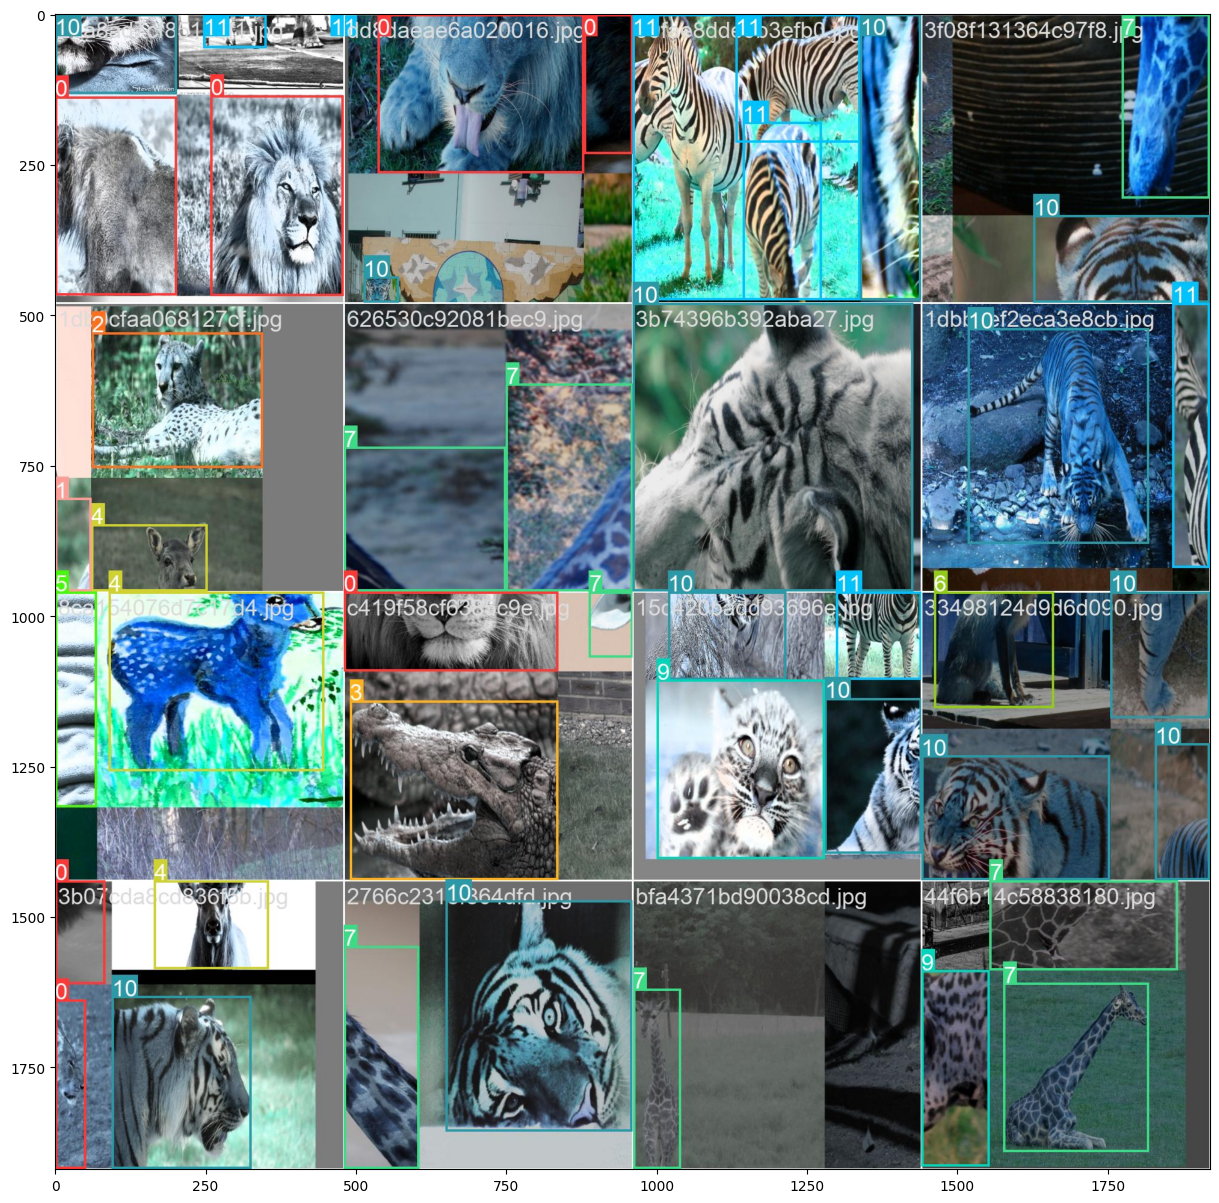

In [24]:
img = mpimg.imread('runs/train/exp/train_batch1.jpg')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

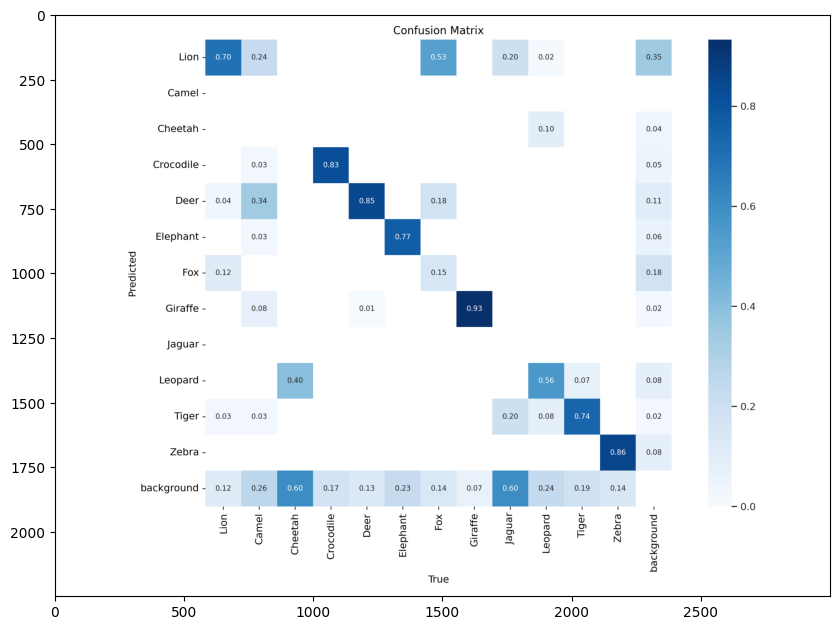

In [25]:
###Plot for the f1 scores achieved during the training
img = mpimg.imread('/kaggle/working/yolov3/runs/train/exp/confusion_matrix.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

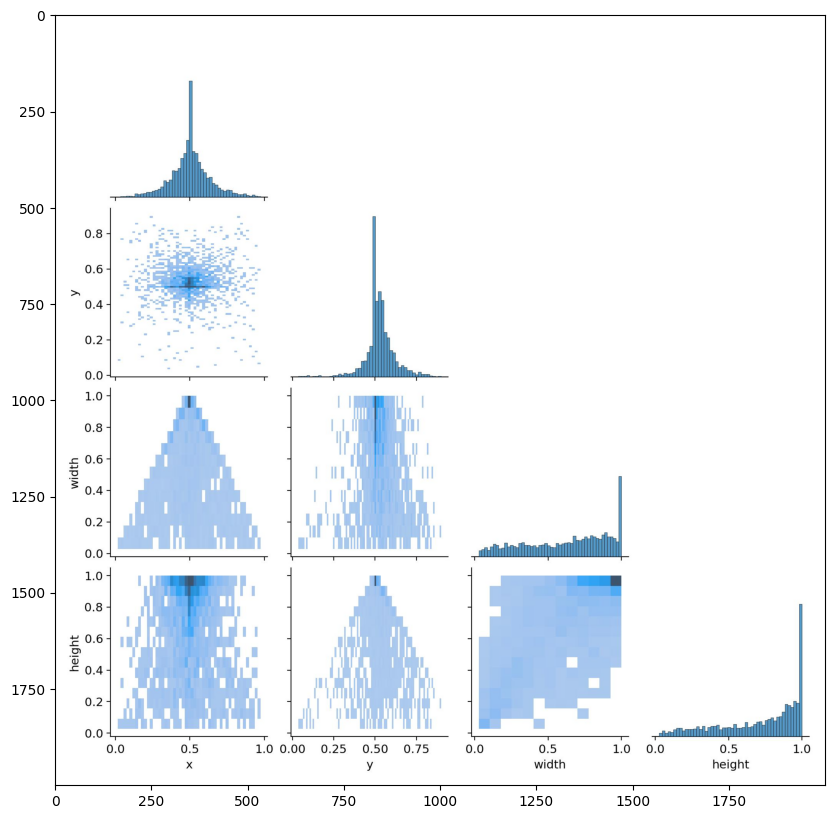

In [26]:
###Plot for the f1 scores achieved during the training
img = mpimg.imread('/kaggle/working/yolov3/runs/train/exp/labels_correlogram.jpg')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

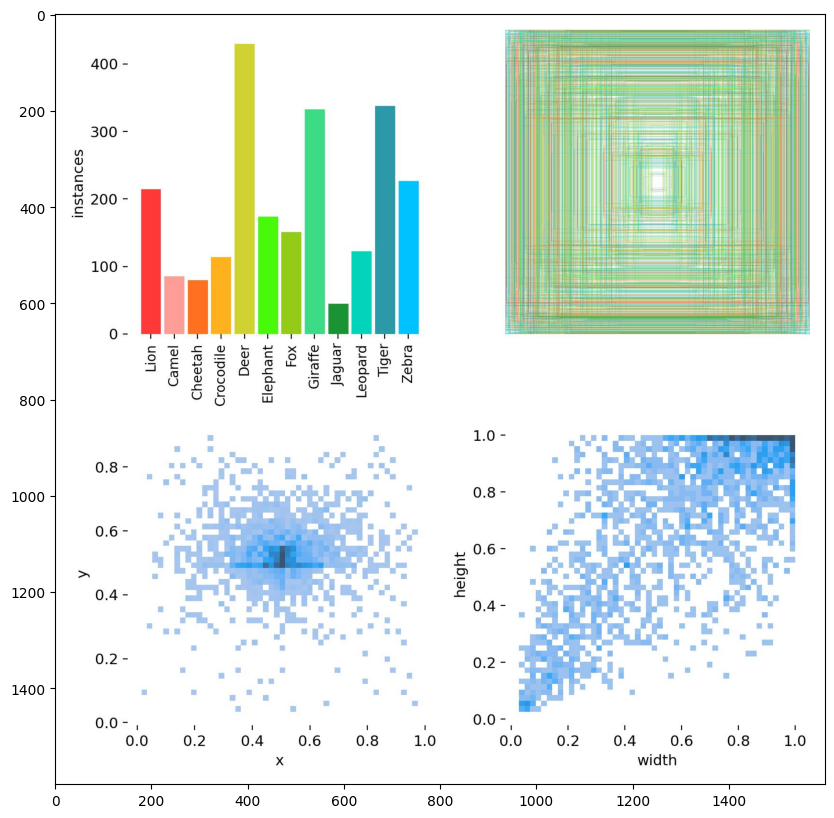

In [27]:
###Plot for the f1 scores achieved during the training
img = mpimg.imread('/kaggle/working/yolov3/runs/train/exp/labels.jpg')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

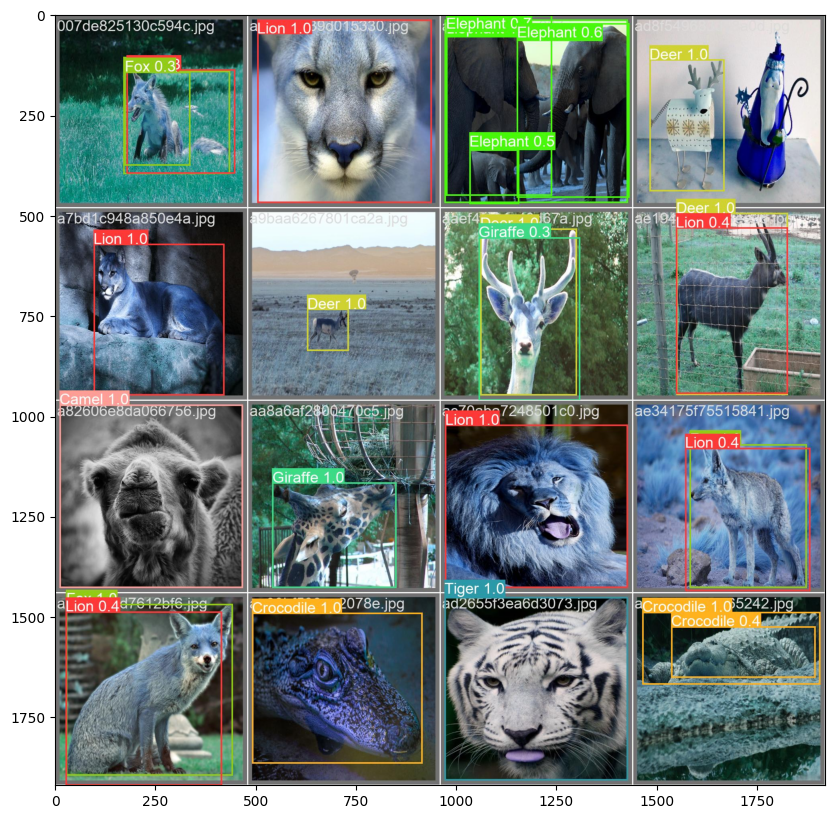

In [28]:
###Plot for the f1 scores achieved during the training
img = mpimg.imread('/kaggle/working/yolov3/runs/val/exp/val_batch0_pred.jpg')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

# Fast RCNN by PyTorch

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
from torchvision import datasets, models
from torchvision.transforms import functional as FT
from torchvision import transforms as T
from torch.utils.data import DataLoader, sampler, random_split, Dataset
from PIL import Image
import cv2
import albumentations as A  # our data augmentation library

import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
!touch /kaggle/working/Animal_dataset.csv
%ls

CITATION.cff     __pycache__/   detect.py         runs/           utils/
CONTRIBUTING.md  benchmarks.py  export.py         segment/        val.py
LICENSE          classify/      hubconf.py        setup.cfg       wandb/
README.md        data/          models/           train.py        yolov3.pt
README.zh-CN.md  datasets/      requirements.txt  tutorial.ipynb  yolov8n.pt


# Converting Dataset to a CSV File

In [31]:
import os
import csv

# Define the directory containing animal data
animal_dir = "/kaggle/input/animals-detection-images-dataset/train"

# Define the CSV file path
csv_file = "Animal_dataset.csv"


# Open CSV file in write mode and create a CSV writer object
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['img_id', 'class', 'x1', 'x2', 'x3', 'x4']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # Loop through each subdirectory in the animal directory
    for subdir in animals_detect:
        subdir_path = os.path.join(animal_dir, subdir)

        # Loop through each .txt file in the 'labels' directory of the current subdirectory
        for txt_file in os.listdir(os.path.join(subdir_path, 'Label')):
            if txt_file.endswith('.txt'):
                txt_file_path = os.path.join(subdir_path, 'Label', txt_file)

                # Read class and coordinates from the .txt file
                with open(txt_file_path, 'r') as txtfile:
                    lines = txtfile.readlines()
                    class_label, x1, x2, x3, x4 = lines[0].strip().split()
                    class_label = animals_encoding[class_label]
                    img_id = str(class_label) + '|' + os.path.splitext(txt_file)[0] + '.jpg'

                    # Write data to CSV file
                    writer.writerow({'img_id': img_id, 'class': class_label, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4})

print("CSV file created successfully.")

CSV file created successfully.


## Observing Dataset

In [32]:
import pandas as pd
Data = pd.read_csv(csv_file)
Data[1687:1695]

img_id  class          x1          x2           x3  \
1687  10|1a46299c43be9a1d.jpg     10  204.999680   30.000092  1022.999552   
1688  10|27b6388dc23572a9.jpg     10    0.000000    4.480506   929.920000   
1689  10|76b341ae9b9b29fe.jpg     10    0.000000  137.555894   822.125568   
1690  10|12f89865d8c16fc6.jpg     10    2.560000   36.505764  1022.080000   
1691  10|0b4d9b81cce28074.jpg     10  184.960000  468.308982   325.120000   
1692  10|0d48de8d562b862f.jpg     10   19.200000   46.712390   936.320000   
1693  10|284d750faa30c559.jpg     10  107.892736  211.888576   945.532928   
1694  10|1c48acd28b3f6d71.jpg     10    0.000000   83.933187   957.440000   

              x4  
1687  658.000151  
1688  746.359821  
1689  655.586043  
1690  682.078644  
1691  598.359070  
1692  772.359956  
1693  618.988253  
1694  447.858126

In [33]:
Data.shape

(2160, 6)

In [34]:
Data.drop('class', axis=1, inplace=True)

In [35]:
Data.head()

img_id      x1          x2       x3           x4
0  0|a5fade4847f797e4.jpg    0.00    0.000000  1023.36   767.360256
1  0|f25f55d9bd349346.jpg    0.00    0.000000  1024.00  1024.000000
2  0|e52b50353fd22aa5.jpg   71.68   37.802001  1023.36   680.437384
3  0|a8bb4c3f04d2ab6c.jpg  465.28  187.399560   768.64   397.184920
4  0|c23e59ab608e0b02.jpg    0.00   16.651800  1013.76   724.359825

In [36]:
import cv2
import os
import copy
import re
import torch
import torchvision
from torchvision import transforms 
from torch.utils.data import Dataset,DataLoader
from torch.utils.data import Subset
import torch.optim as optim
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from sklearn.model_selection import ShuffleSplit
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Intializing Manual Random Seed

In [37]:
np.random.seed(42)
torch.manual_seed(42)

In [38]:
dataframe=Data
image_dir = "/kaggle/input/animals-detection-images-dataset/train"
test_dir = "/kaggle/input/animals-detection-images-dataset/test"
model_weights_file = "model.pth"

device = "cuda" if torch.cuda.is_available() else "cpu"

#Put Hyperparameters 
batch_size = 4
learning_rate = 0.001
epochs = 5

threshold=0.5
iou_threshold=0.8

## Creating Class to prepare data for DataLoader from csv file

In [39]:
"""The input to the model is expected to be a list of tensors, each of shape [c, h, w], 
   one for each image, and should be in 0-1 range. Different images can have different 
   sizes."""
   
   
class AnimalDataset(Dataset):
    def __init__(self,dataframe,image_dir, animals_encoding ):
        super().__init__()
        self.dataframe=dataframe
        self.img_list=sorted(self.dataframe["img_id"].unique())
        self.img_dir=image_dir
        self.animals_encoding = animals_encoding
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self,idx):
        img_id = self.img_list[idx]
        string_id = img_id.split('|')
        class_int = string_id[0]    
        class_int = int(class_int)
        reverse_encoding = {v: k for k, v in self.animals_encoding.items()}
        class_value = reverse_encoding.get(class_int)
        img_name = string_id[1]
        img_path = os.path.join("/kaggle/input/animals-detection-images-dataset",self.img_dir , class_value, img_name)
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=transforms.functional.to_tensor(img)
        
#         inter=self.dataframe[self.dataframe["img_id"]==self.img_list[idx]]
        boxes_array = np.array(self.dataframe.loc[self.dataframe['img_id'] == img_id, ['x1','x2','x3','x4']])
        boxes = torch.as_tensor(boxes_array, dtype=torch.float32)
        area = []
        for box in boxes:
            width = box[2] - box[0]
            height = box[3] - box[1]
            area.append(width * height) 
#         boxes=inter[["x1","x2","x3","x4"]].values
        
#         area=boxes[:,2]*boxes[:,3]
        
#         # converting bounding box from x0y0wh format to x0y0x1y1 format
#         boxes[:,2]=boxes[:,0]+boxes[:,2]
#         boxes[:,3]=boxes[:,1]+boxes[:,3]
        labels=torch.ones((boxes.shape[0]),dtype=torch.int64)
        labels=torch.as_tensor([class_int] * len(labels),dtype=torch.int64)
        iscrowd=torch.zeros((boxes.shape[0]),dtype=torch.uint8)
        
        target={}
        target["boxes"]=boxes
        target["area"]=torch.as_tensor(area,dtype=torch.float32)
        target["labels"]=labels
        target["iscrowd"]=iscrowd
        target["id"]=torch.tensor(idx)
        
        return img,target

In [40]:
train_ds=AnimalDataset(dataframe,image_dir,animals_encoding)
val_ds=AnimalDataset(dataframe,image_dir,animals_encoding)

## Shuffling both datasets

In [41]:
# Shuffle and Split data to 20% test and 80% Train
ss=ShuffleSplit(n_splits=1,test_size=0.2,random_state=1)

indexs=range(len(train_ds))
for train_idx,val_idx in ss.split(indexs):
    print(f"Train dataset length: {len(train_idx)}")
    print(f"Validation dataset length: {len(val_idx)}")

Train dataset length: 1728
Validation dataset length: 432


In [42]:
train_ds=Subset(train_ds,train_idx)
val_ds=Subset(val_ds,val_idx)

In [43]:
def show(img,boxes):
    boxes=boxes.detach().numpy().astype(np.int32)
    sample=img.permute(1,2,0).numpy().copy()
    
    for box in boxes:
        cv2.rectangle(sample,(box[0], box[1]),(box[2], box[3]),(220, 0, 0), 3)
    
    plt.axis("off");
    plt.imshow(sample);

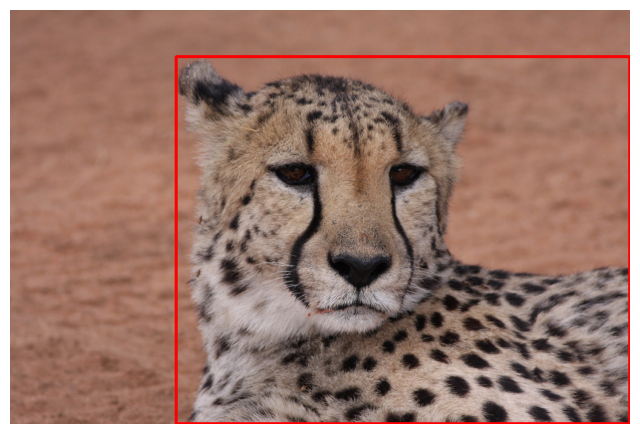

In [44]:
plt.figure(figsize=(8,8))

img,target=next(iter(train_ds))
show(img,target["boxes"])
plt.savefig("1.png")

In [45]:
def collate_fn(batch):
    return tuple(zip(*batch))

train_dl=DataLoader(train_ds,batch_size=batch_size,shuffle=True,num_workers=2,
                    pin_memory=True if torch.cuda.is_available else False,
                    collate_fn=collate_fn)
val_dl=DataLoader(val_ds,batch_size=batch_size,shuffle=False,num_workers=2,
                  pin_memory=True if torch.cuda.is_available else False,
                  collate_fn=collate_fn)

In [46]:
def get_lr(optimizer):
    for params in optimizer.param_groups:
        return params["lr"]

## Importing Model

In [47]:
# load a model pre-trained on COCO
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn(weights=weights)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 268MB/s] 


In [48]:
num_classes = len(animals_detect)

# get number of input features for the classifier
in_features=model.roi_heads.box_predictor.cls_score.in_features


# replace the pre-trained head with a new one
model.roi_heads.box_predictor=FastRCNNPredictor(in_channels=in_features, num_classes=num_classes)

model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [49]:
classification_head = list(model.children())[-2:]

for children in list(model.children())[:-2]:
    for params in children.parameters():
        params.requires_grad=False
        
parameters = []
for heads in classification_head:
    for params in heads.parameters():
        parameters.append(params)
        
# Optimization using Adam 
optimizer = optim.Adam(parameters,lr=learning_rate)    

# scheduling learning rate  https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',
                                                    factor=0.1, 
                                                    patience=9,
                                                    threshold=0.0001)

## Training Model

In [50]:
loss_history={"training_loss":[],
              "validation_loss":[]}

train_len=len(train_dl.dataset)
val_len=len(val_dl.dataset)

best_validation_loss=np.inf
best_weights=copy.deepcopy(model.state_dict())

for epoch in range(epochs):
    
    training_loss=0.0
    validation_loss=0.0
    current_lr=get_lr(optimizer)
    
    #During training, the model expects both the input tensors, as well as a targets 
    model.train()
    for imgs,targets in train_dl:
        imgs=[img.to(device) for img in imgs]
        targets=[{k:v.to(device) for (k,v) in d.items()} for d in targets]
        
        """The model returns a Dict[Tensor] during training, containing the classification
           and regression losses for both the RPN and the R-CNN."""
        
        loss_dict=model(imgs,targets)
        losses=sum(loss for loss in loss_dict.values())
        training_loss+=losses.item()
        
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
    with torch.no_grad():
        for imgs,targets in val_dl:
            imgs=[img.to(device) for img in imgs]
            targets=[{k:v.to(device) for (k,v) in d.items()} for d in targets]
            
            """The model returns a Dict[Tensor] during training, containing the classification
               and regression losses for both the RPN and the R-CNN."""
            
            loss_dict=model(imgs,targets)
            losses=sum(loss for loss in loss_dict.values())
            validation_loss+=losses.item()
            
            
    lr_scheduler.step(validation_loss)
    if current_lr!=get_lr(optimizer):
        print("Loading best Model weights")
        model.load_state_dict(best_weights)
    
    if validation_loss<best_validation_loss:
        best_validation_loss=validation_loss
        best_weights=copy.deepcopy(model.state_dict())
        print("Updating Best Model weights")
        
    
    loss_history["training_loss"].append(training_loss/train_len)
    loss_history["validation_loss"].append(validation_loss/val_len)
            
    print(f"\n{epoch+1}/{epochs}")
    print(f"Training Loss: {training_loss/train_len}")
    print(f"Validation_loss: {validation_loss/val_len}")
    print("\n"+"*"*40)

Updating Best Model weights

1/5
Training Loss: 0.04822378430118853
Validation_loss: 0.05431265887562876

****************************************
Updating Best Model weights

2/5
Training Loss: 0.04467101862947284
Validation_loss: 0.040765954147058504

****************************************

3/5
Training Loss: 0.04173932475882962
Validation_loss: 0.04561190241602836

****************************************

4/5
Training Loss: 0.0374867044307326
Validation_loss: 0.04334377085238143

****************************************

5/5
Training Loss: 0.04599429633364909
Validation_loss: 0.04837306497480582

****************************************


## Traing/Validation loss curve

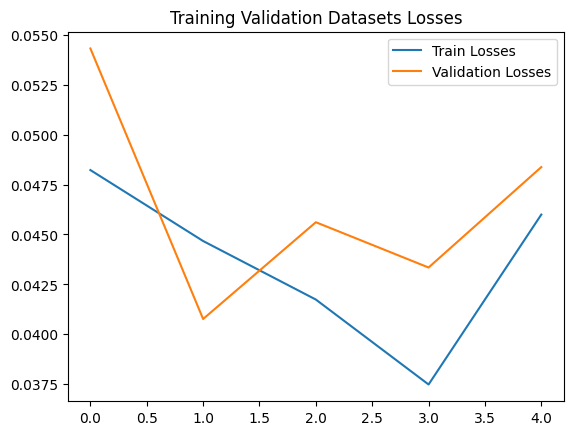

In [51]:
import seaborn as sns

sns.lineplot(x=range(epochs),y=loss_history["training_loss"],label="Train Losses");
sns.lineplot(x=range(epochs),y=loss_history["validation_loss"],label="Validation Losses");
plt.title("Training Validation Datasets Losses");
plt.legend();
plt.savefig("3.jpg")

In [52]:
torch.save(best_weights,model_weights_file)

In [53]:
model.load_state_dict(torch.load(model_weights_file))
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [54]:
def show(img,boxes,ax,color=(255,0,0)):
    boxes=boxes.detach().cpu().numpy().astype(np.int32)
    sample=img.permute(1,2,0).numpy().copy()
    
    for box in boxes:
        cv2.rectangle(sample,(box[0], box[1]),(box[2], box[3]),color, 3)
    
    ax.axis("off");
    ax.imshow(sample);

## Checking Model Predictions

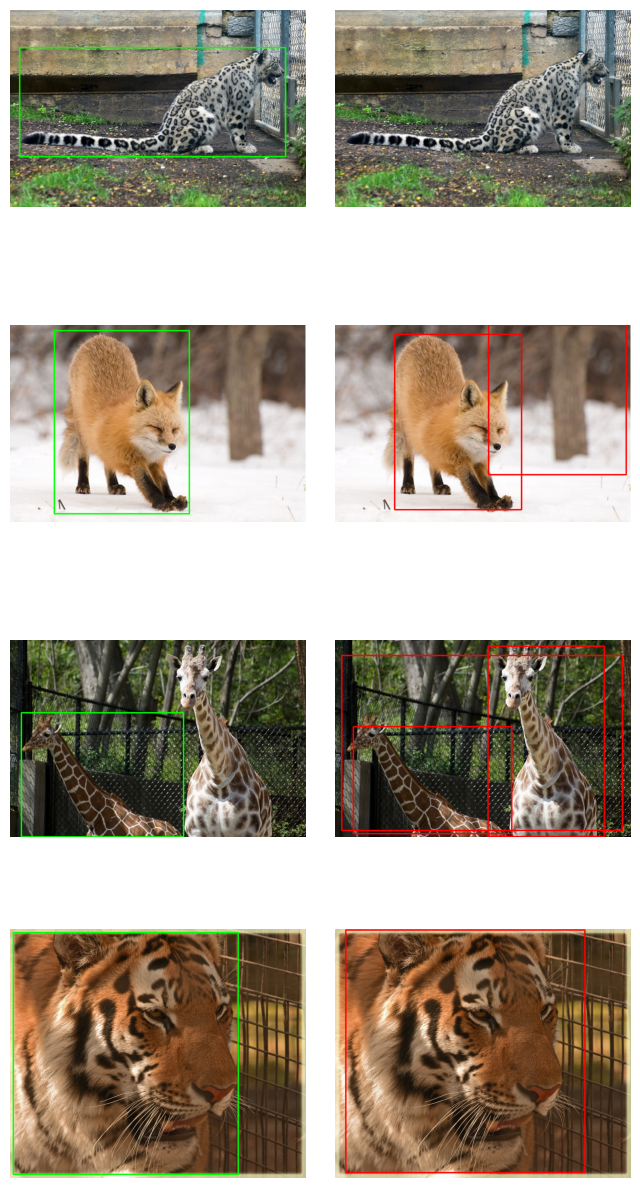

In [55]:
"""During inference, the model requires only the input tensors, and returns the 
   post-processed predictions as a List[Dict[Tensor]], one for each input image. The fields
   of the Dict are as follows:
   - boxes (FloatTensor[N, 4]): the predicted boxes in [x0, y0, x1, y1] format
   - labels (Int64Tensor[N]): the predicted labels for each image
   - scores (Tensor[N]): the scores or each prediction"""

fig,axes=plt.subplots(4,2,figsize=(8,16))
plt.subplots_adjust(wspace=0.1,hspace=0.1)

imgs,targets=next(iter(train_dl))
model.eval()
output=model([img.to(device) for img in imgs])

for i,idx in enumerate(range(len(imgs))):
    img=imgs[idx]
    predictions=output[idx]
    
    #real bounding boxes
    show(img,targets[idx]["boxes"],axes[i,0],color=(0,255,0))
    
    #non-max suppression
    threshold=0.5
    iou_threshold=0.8
    """Non-max suppression is the final step of these object detection algorithms and is 
       used to select the most appropriate bounding box for the object.
       The NMS takes two things into account
        -The objectiveness score is given by the model
        -The overlap or IOU of the bounding boxes"""
    
    pp_boxes=predictions["boxes"][predictions["scores"]>=threshold]
    scores=predictions["scores"][predictions["scores"]>=threshold]
    nms=torchvision.ops.nms(pp_boxes,scores,iou_threshold=iou_threshold)
    pp_boxes=pp_boxes[nms]

    
    show(img,pp_boxes,axes[i,1]);
    
plt.savefig("4.png")

In [56]:
# Initialize empty lists to store predictions, ground truth labels, and confidence scores
all_predictions = []
all_labels = []
all_confidences = []

with torch.no_grad():
    for imgs, targets in val_dl:
        imgs = [img.to(device) for img in imgs]
        targets = [{k: v.to(device) for (k, v) in d.items()} for d in targets]

        # The model returns a Dict[Tensor] during validation, containing predictions
        prediction_dict = model(imgs)
        # Extract predictions, labels, and confidences from the prediction_dict
        for i in range(len(imgs)):
            predictions = prediction_dict[i]["labels"].cpu().numpy()
            confidences = prediction_dict[i]["scores"].cpu().numpy()
            labels = targets[i]["labels"].cpu().numpy()
           
            
            # Append predictions, labels, and confidences to the respective lists
            all_predictions.append(predictions)
            all_labels.append(labels)
            all_confidences.append(confidences)

In [57]:
predictions = []
for pred in all_predictions:
    for i,p in enumerate(pred):
        if i == 0:
            predictions.append(p)

In [58]:
print(len(all_labels))
print(len(predictions))

432
432


In [59]:
print(all_labels[100])
print([predictions[100]])

[10]
[10]


In [60]:
num_classes = len(animals_detect)

In [61]:
all_predictions_flat = np.concatenate([predictions])
all_labels_flat = np.concatenate(all_labels)
all_confidences_flat = np.concatenate(all_confidences)

In [62]:
from sklearn.metrics import f1_score,recall_score, precision_score,accuracy_score

# Concatenate the lists to create flat arrays


# Calculate F1 scores for each label
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []
for label in range(num_classes):  # num_classes is the total number of classes in your dataset
    f1 = f1_score(all_labels_flat == label, all_predictions_flat == label,average='macro')
    rec = recall_score(all_labels_flat == label, all_predictions_flat == label,average="macro")
    pre =  precision_score(all_labels_flat == label, all_predictions_flat == label,zero_division=0,average='weighted')
    acc = accuracy_score(all_labels_flat == label, all_predictions_flat == label)
    f1_scores.append(f1)
    recall_scores.append(rec)
    precision_scores.append(pre)
    accuracy_scores.append(acc)

# f1_scores now contains the F1 scores for each label

In [63]:
f1_scores[6]

0.7442377967866403

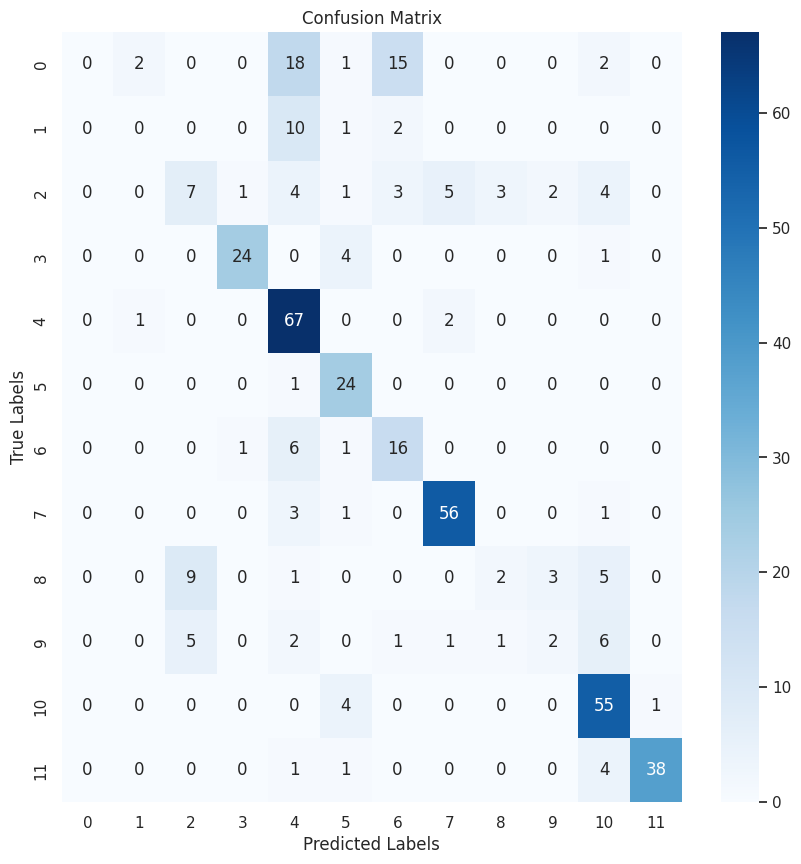

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels_flat, all_predictions_flat)

# Get class labels
class_labels = unique_labels(all_labels_flat, all_predictions_flat)

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.0)  # Adjust the font size for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Comparing Performance of YOLOv3 and Fast RCNN

## F1 Score

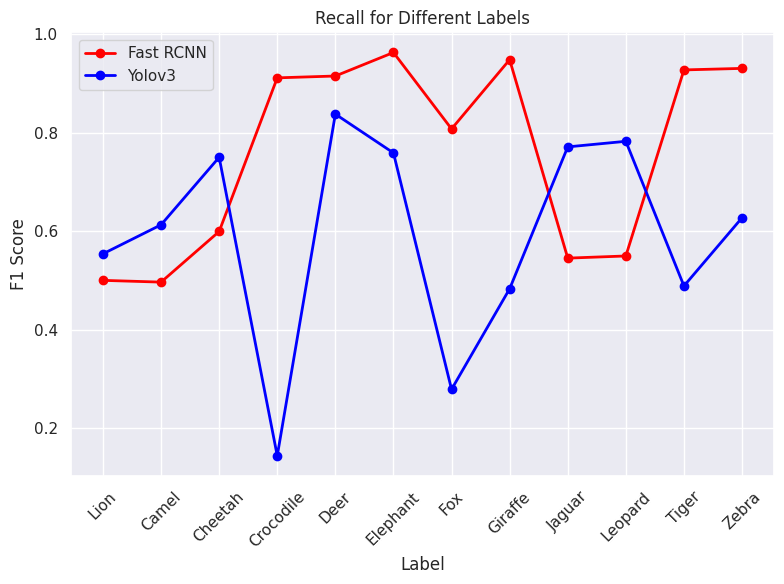

In [65]:

plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(f1_scores)), recall_scores, color='red', s=10)
plt.scatter(np.arange(len(f1_scores)), yolo_f1_score_list, color='blue', s=10)
plt.plot(np.arange(len(f1_scores)), recall_scores,label='Fast RCNN', color='red', linewidth=2, linestyle='-', marker='o')
plt.plot(np.arange(len(f1_scores)),yolo_f1_score_list,label='Yolov3', color='blue', linewidth=2, linestyle='-', marker='o')
plt.xlabel('Label')
plt.ylabel('F1 Score')
plt.title('Recall for Different Labels')
plt.xticks(np.arange(len(recall_scores)), animals_detect, rotation=45)  # Set x-ticks to label names and rotate them for better visibility
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Recall

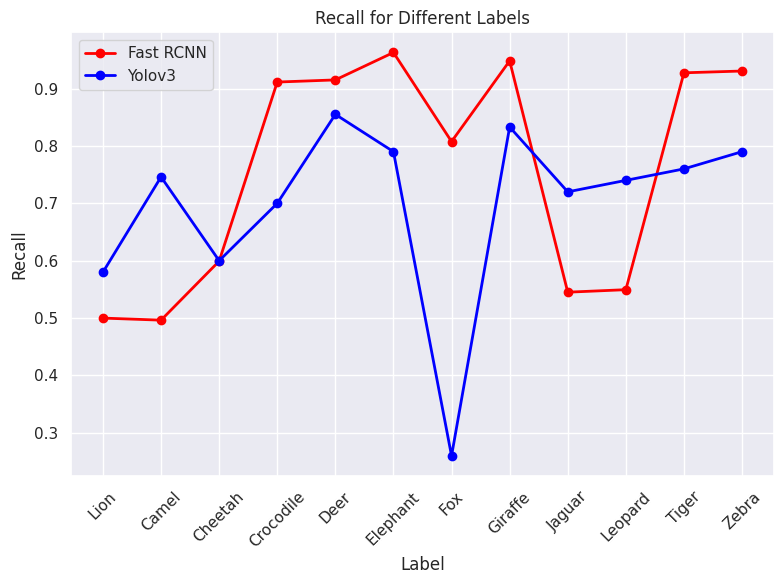

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(recall_scores)), recall_scores, color='red',  s=10)
plt.scatter(np.arange(len(recall_scores)), yolo_rec_list, color='blue',  s=10)
plt.plot(np.arange(len(recall_scores)), recall_scores,label='Fast RCNN', color='red', linewidth=2, linestyle='-', marker='o')
plt.plot(np.arange(len(recall_scores)),yolo_rec_list,label='Yolov3', color='blue', linewidth=2, linestyle='-', marker='o')
plt.xlabel('Label')
plt.ylabel('Recall')
plt.title('Recall for Different Labels')
plt.xticks(np.arange(len(recall_scores)), animals_detect, rotation=45)  # Set x-ticks to label names and rotate them for better visibility
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Prescision

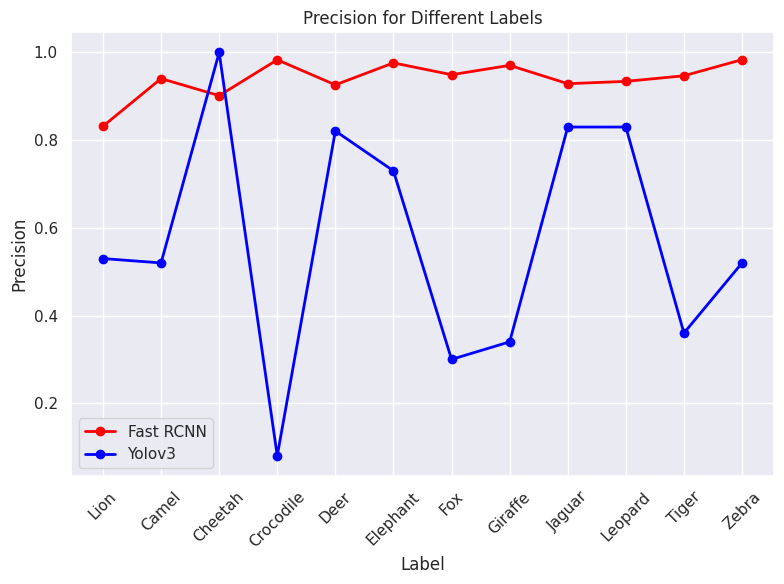

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(precision_scores)), precision_scores, color='red', s=10)
plt.scatter(np.arange(len(precision_scores)), yolo_precision_list, color='blue',  s=10)
plt.plot(np.arange(len(precision_scores)), precision_scores,label='Fast RCNN', color='red', linewidth=2, linestyle='-', marker='o')
plt.plot(np.arange(len(precision_scores)),yolo_precision_list,label='Yolov3', color='blue', linewidth=2, linestyle='-', marker='o')
plt.xlabel('Label')
plt.ylabel('Precision')
plt.title('Precision for Different Labels')
plt.xticks(np.arange(len(precision_scores)), animals_detect, rotation=45)  # Set x-ticks to label names and rotate them for better visibility
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Accuracy

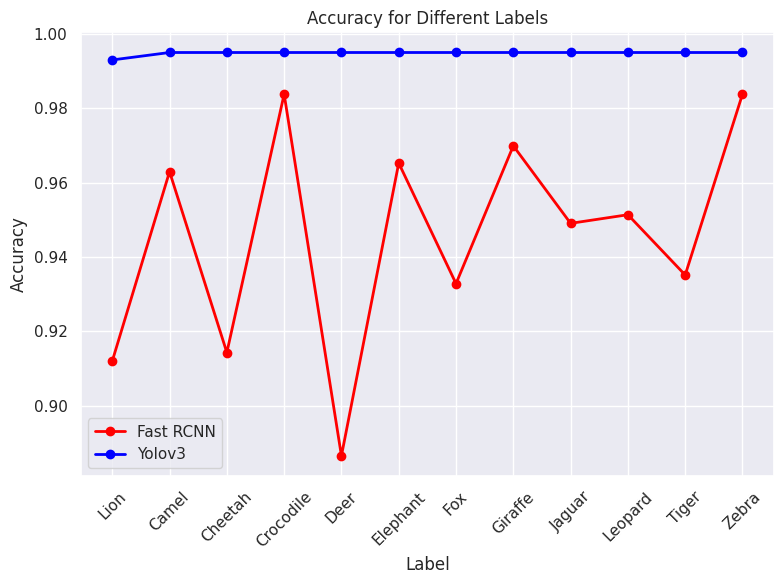

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(accuracy_scores)), accuracy_scores, color='red', s=10)
plt.scatter(np.arange(len(accuracy_scores)), yolo_accuracy, color='blue',  s=10)
plt.plot(np.arange(len(accuracy_scores)), accuracy_scores,label='Fast RCNN', color='red', linewidth=2, linestyle='-', marker='o')
plt.plot(np.arange(len(accuracy_scores)),yolo_accuracy,label='Yolov3', color='blue', linewidth=2, linestyle='-', marker='o')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Labels')
plt.xticks(np.arange(len(precision_scores)), animals_detect, rotation=45)  # Set x-ticks to label names and rotate them for better visibility
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
rcnn_accuracy_score = sum(accuracy_scores)/len(accuracy_scores)
yolo_accuracy_ = sum(yolo_accuracy)/len(yolo_accuracy)
rcnn_eff = (rcnn_accuracy_score / float(faster_rcnn_time-4))*100
yolo_eff = (yolo_accuracy_ / float(time_per_image)) * 100

## Model Efficency i.e (Average Accuracy/Time per image) * 100

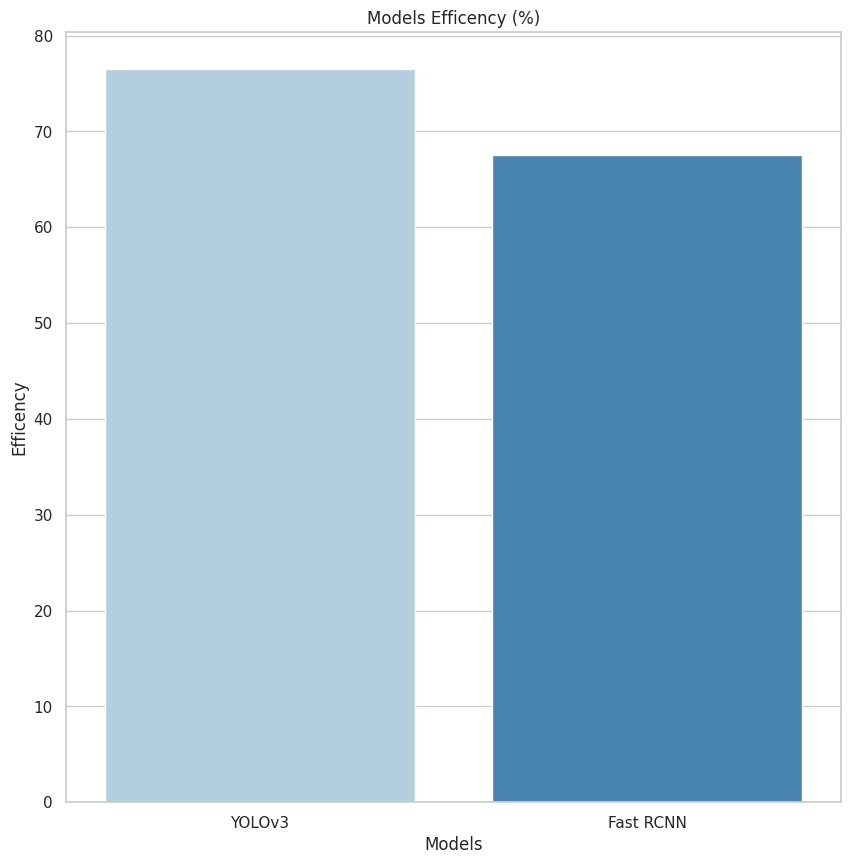

In [70]:
models = ['YOLOv3', 'Fast RCNN']
values = [yolo_eff , rcnn_eff]
sns.set(style="whitegrid")  # Optional: Set the style of the plot
plt.figure(figsize=(10, 10))  # Optional: Set the size of the plot
sns.barplot(x=models, y=values, palette="Blues")  # Create the bar chart using Seaborn

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Efficency')
plt.title('Models Efficency (%)')

# Show the plot
plt.show()

In [71]:
import pandas as pd
yolo_train_loss = pd.read_csv('/kaggle/input/train-val-loss-yolo/Train_cls_loss.csv')
yolo_val_loss = pd.read_csv('/kaggle/input/train-val-loss-yolo/Val_ cls_loss.csv')

## Cross Entropy Loss

In [72]:
yolo_val_loss

Step  train3 - val/cls_loss  train3 - val/cls_loss__MIN  \
0     1                1.13673                     1.13673   
1     2                1.09504                     1.09504   
2     3                1.07095                     1.07095   
3     4                1.05479                     1.05479   
4     5                1.04233                     1.04233   

   train3 - val/cls_loss__MAX  
0                     1.13673  
1                     1.09504  
2                     1.07095  
3                     1.05479  
4                     1.04233

In [73]:
print(yolo_train_loss)
print(yolo_val_loss)

   Step  train3 - train/cls_loss  train3 - train/cls_loss__MIN  \
0     1                  1.59533                       1.59533   
1     2                  1.37329                       1.37329   
2     3                  1.30279                       1.30279   
3     4                  1.34953                       1.34953   
4     5                  1.29038                       1.29038   

   train3 - train/cls_loss__MAX  
0                       1.59533  
1                       1.37329  
2                       1.30279  
3                       1.34953  
4                       1.29038  
   Step  train3 - val/cls_loss  train3 - val/cls_loss__MIN  \
0     1                1.13673                     1.13673   
1     2                1.09504                     1.09504   
2     3                1.07095                     1.07095   
3     4                1.05479                     1.05479   
4     5                1.04233                     1.04233   

   train3 - val/cls_loss__

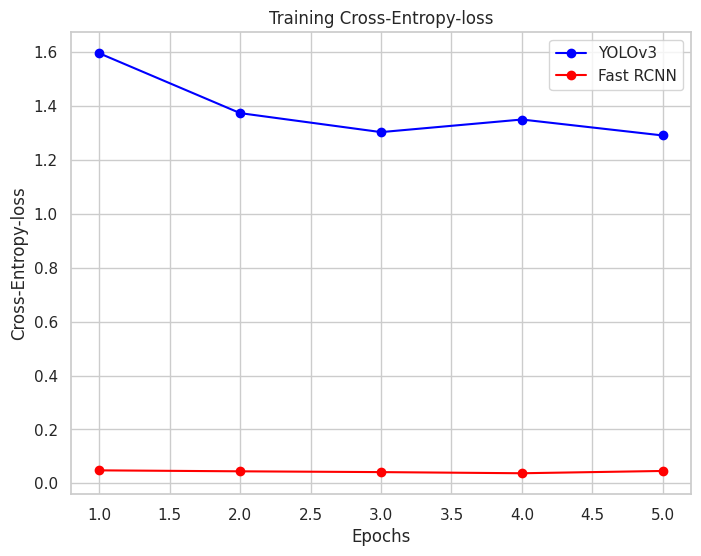

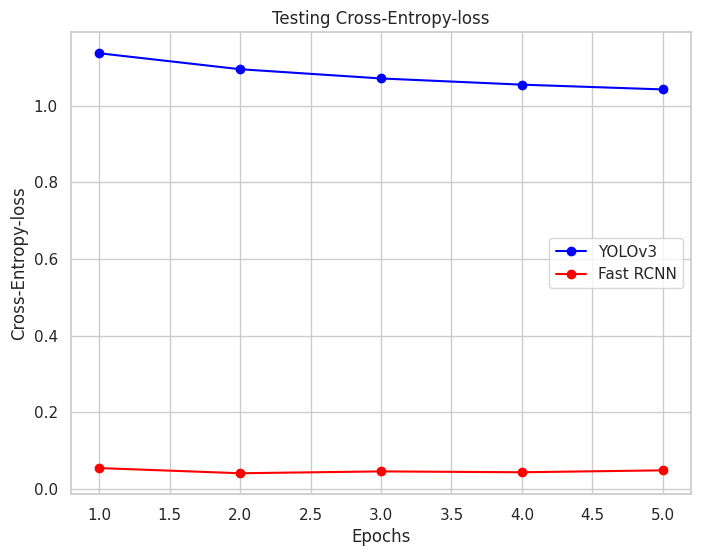

In [74]:
train_x = yolo_train_loss['Step']
train_y = yolo_train_loss['train3 - train/cls_loss']
loss_history["training_loss"]
val_x = train_x
val_y = yolo_val_loss['train3 - val/cls_loss']

# Plotting the graph
plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)
plt.plot(train_x, train_y, marker='o', linestyle='-', color='blue', label='YOLOv3')
plt.plot(train_x, loss_history["training_loss"], marker='o', linestyle='-', color='red', label='Fast RCNN')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy-loss')
plt.title('Training Cross-Entropy-loss')
plt.legend()  # Show legend (optional)
plt.grid(True)  # Show grid (optional)
plt.show()

plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)
plt.plot(val_x, val_y, marker='o', linestyle='-', color='blue', label='YOLOv3')
plt.plot(val_x, loss_history["validation_loss"], marker='o', linestyle='-', color='red', label='Fast RCNN')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy-loss')
plt.title('Testing Cross-Entropy-loss')
plt.legend()  # Show legend (optional)
plt.grid(True)  # Show grid (optional)
plt.show()

In [75]:

faster_rcnn_precision = precision_score(all_labels,predictions,zero_division=0,average='weighted')
faster_rcnn_recall = recall_score(all_labels,predictions,average='weighted')
faster_rcnn_f1_score = f1_score(all_labels,predictions,average='weighted')

In [76]:
from IPython.display import display

# Create the DataFrame
df = pd.DataFrame([[time_per_image, yolo_precision, yolo_rec, yolo_f1_score],
                   [faster_rcnn_time, faster_rcnn_precision,faster_rcnn_recall, faster_rcnn_f1_score]],
                  index=pd.Index(['YOLOv3', 'Fast RCNN'], name='Model'),
                  columns=pd.Index(['Average Prediction Time(ms)', 'Precision', 'Recall', 'F1_score']))

# Apply styling to the DataFrame
styled_df = df.style.highlight_max(axis=0, color='lightgreen')
styled_df = styled_df.highlight_min(axis=0, color='lightcoral')

# Display the styled DataFrame
display(styled_df)